In [1]:
import pandas as pd

df = pd.read_csv('taxi_trip_pricing.csv')
df.head()

Trip_Distance_km Time_of_Day Day_of_Week  Passenger_Count  \
0             19.35     Morning     Weekday              3.0   
1             47.59   Afternoon     Weekday              1.0   
2             36.87     Evening     Weekend              1.0   
3             30.33     Evening     Weekday              4.0   
4               NaN     Evening     Weekday              3.0   

  Traffic_Conditions Weather  Base_Fare  Per_Km_Rate  Per_Minute_Rate  \
0                Low   Clear       3.56         0.80             0.32   
1               High   Clear        NaN         0.62             0.43   
2               High   Clear       2.70         1.21             0.15   
3                Low     NaN       3.48         0.51             0.15   
4               High   Clear       2.93         0.63             0.32   

   Trip_Duration_Minutes  Trip_Price  
0                  53.82     36.2624  
1                  40.57         NaN  
2                  37.27     52.9032  
3                 116.81     36.4698  
4                  22.64     15.6180

In [2]:
df.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
from sklearn import preprocessing

le_Time_of_Day = preprocessing.LabelEncoder()
le_Time_of_Day.fit(df['Time_of_Day']) 

le_Day_of_Week = preprocessing.LabelEncoder()
le_Day_of_Week.fit(df['Day_of_Week']) 

le_Traffic_Conditions = preprocessing.LabelEncoder()
le_Traffic_Conditions.fit(df['Traffic_Conditions']) 

le_Weather = preprocessing.LabelEncoder()
le_Weather.fit(df['Weather']) 


df['Time_of_Day_num'] = le_Time_of_Day.transform(df['Time_of_Day']) 
df['Day_of_Week_num'] = le_Day_of_Week.transform(df['Day_of_Week']) 
df['Traffic_Conditions_num'] = le_Traffic_Conditions.transform(df['Traffic_Conditions']) 
df['Weather_num'] = le_Weather.transform(df['Weather']) 

df = df.drop(columns=['Time_of_Day',	'Day_of_Week', 'Traffic_Conditions',	'Weather'])
df.head()

Trip_Distance_km  Passenger_Count  Base_Fare  Per_Km_Rate  \
0              19.35              3.0       3.56         0.80   
2              36.87              1.0       2.70         1.21   
5               8.64              2.0       2.55         1.71   
12             41.79              3.0       4.60         1.77   
14              9.91              2.0       2.32         1.26   

    Per_Minute_Rate  Trip_Duration_Minutes  Trip_Price  Time_of_Day_num  \
0              0.32                  53.82     36.2624                2   
2              0.15                  37.27     52.9032                1   
5              0.48                  89.33     60.2028                0   
12             0.11                  86.95     88.1328                3   
14             0.34                  41.72     28.9914                1   

    Day_of_Week_num  Traffic_Conditions_num  Weather_num  
0                 0                       1            0  
2                 1                       0            0  
5                 1                       2            0  
12                1                       0            0  
14                0                       0            0

In [6]:
df.describe()

Trip_Distance_km  Passenger_Count   Base_Fare  Per_Km_Rate  \
count        562.000000       562.000000  562.000000   562.000000   
mean          27.772941         2.533808    3.509893     1.219858   
std           21.153175         1.108915    0.871082     0.430351   
min            1.270000         1.000000    2.010000     0.500000   
25%           13.135000         2.000000    2.722500     0.840000   
50%           26.420000         3.000000    3.545000     1.200000   
75%           38.827500         4.000000    4.260000     1.580000   
max          146.067047         4.000000    5.000000     2.000000   

       Per_Minute_Rate  Trip_Duration_Minutes  Trip_Price  Time_of_Day_num  \
count       562.000000             562.000000  562.000000       562.000000   
mean          0.288221              61.825089   57.663525         1.104982   
std           0.114834              32.128436   43.958741         1.046858   
min           0.100000               5.010000    6.126900         0.000000   
25%           0.190000              36.530000   33.583875         0.000000   
50%           0.280000              61.210000   50.157850         1.000000   
75%           0.387500              88.435000   69.146575         2.000000   
max           0.500000             119.840000  332.043689         3.000000   

       Day_of_Week_num  Traffic_Conditions_num  Weather_num  
count       562.000000              562.000000   562.000000  
mean          0.322064                1.227758     0.387900  
std           0.467684                0.749149     0.622567  
min           0.000000                0.000000     0.000000  
25%           0.000000                1.000000     0.000000  
50%           0.000000                1.000000     0.000000  
75%           1.000000                2.000000     1.000000  
max           1.000000                2.000000     2.000000

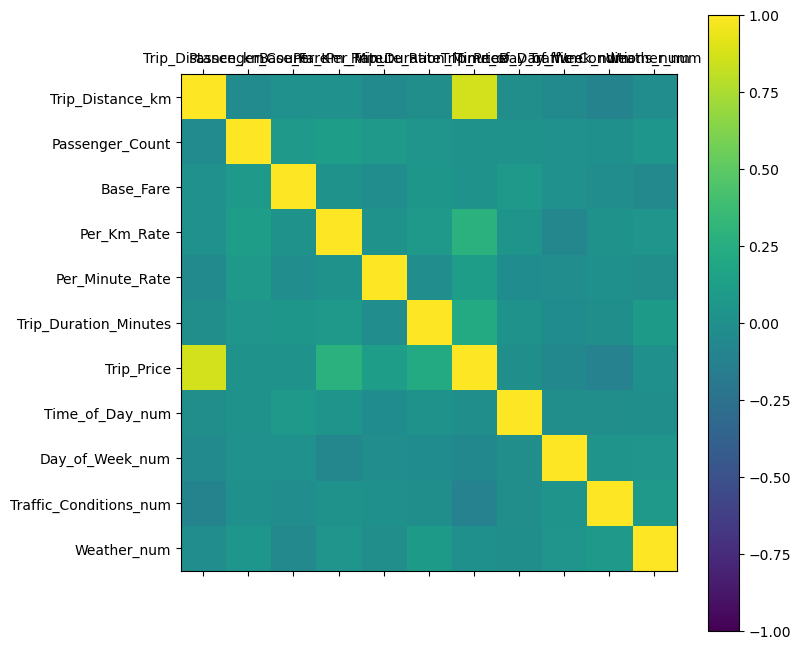

In [9]:
import matplotlib.pyplot as plt

correlations = df.corr(method='pearson')
 
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(1,1,1)

cax = ax.matshow(correlations, vmin=-1, vmax=1)

fig.colorbar(cax)

ticks = [0,1,2,3,4,5,6,7,8,9,10]

ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_xticklabels(['Trip_Distance_km',	'Passenger_Count',	'Base_Fare',	'Per_Km_Rate',	'Per_Minute_Rate',	'Trip_Duration_Minutes',
'Trip_Price',	'Time_of_Day_num',	'Day_of_Week_num',	'Traffic_Conditions_num',	'Weather_num'])
ax.set_yticklabels(['Trip_Distance_km',	'Passenger_Count',	'Base_Fare',	'Per_Km_Rate',	'Per_Minute_Rate',	'Trip_Duration_Minutes',
'Trip_Price',	'Time_of_Day_num',	'Day_of_Week_num',	'Traffic_Conditions_num',	'Weather_num'])
plt.show()

In [10]:
X = df[['Trip_Distance_km',	'Passenger_Count',	'Base_Fare',	'Per_Km_Rate',	'Per_Minute_Rate',	'Trip_Duration_Minutes',
'Time_of_Day_num',	'Day_of_Week_num',	'Traffic_Conditions_num',	'Weather_num']]

y = df['Trip_Price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: -57.785928843792014
Coefficients: [ 1.75117351e+00 -5.72182631e-01  3.00626407e-01  2.46558220e+01
  6.55205573e+01  3.02953709e-01  4.37131175e-01 -3.43476930e-03
 -1.00605119e+00  4.85910448e-01]


In [11]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

print ('MSE :', mean_squared_error (y_pred, y_test))
print ('RMSE :', sqrt(mean_squared_error (y_pred, y_test)))
print ('MAE :', mean_absolute_error(y_pred, y_test))

MSE : 339.93769447703113
RMSE : 18.437399341475228
MAE : 9.87902271493429


In [13]:
df.head()

Trip_Distance_km  Passenger_Count  Base_Fare  Per_Km_Rate  \
0              19.35              3.0       3.56         0.80   
2              36.87              1.0       2.70         1.21   
5               8.64              2.0       2.55         1.71   
12             41.79              3.0       4.60         1.77   
14              9.91              2.0       2.32         1.26   

    Per_Minute_Rate  Trip_Duration_Minutes  Trip_Price  Time_of_Day_num  \
0              0.32                  53.82     36.2624                2   
2              0.15                  37.27     52.9032                1   
5              0.48                  89.33     60.2028                0   
12             0.11                  86.95     88.1328                3   
14             0.34                  41.72     28.9914                1   

    Day_of_Week_num  Traffic_Conditions_num  Weather_num  
0                 0                       1            0  
2                 1                       0            0  
5                 1                       2            0  
12                1                       0            0  
14                0                       0            0

In [17]:
Trip_Distance_km = 100
Passenger_Count = 5
Base_Fare = 5
Per_Km_Rate = 0.5
Per_Minute_Rate = 0.2
Trip_Duration_Minutes = 240 
Time_of_Day_num = 1
Day_of_Week_num = 1
Traffic_Conditions_num = 1 
Weather_num = 1


example = [[Trip_Distance_km,	Passenger_Count,	Base_Fare,	Per_Km_Rate,	Per_Minute_Rate,	Trip_Duration_Minutes,
Time_of_Day_num,	Day_of_Week_num,	Traffic_Conditions_num,	Weather_num]]
print(example)

Taxi_info = pd.DataFrame(example, columns=['Trip_Distance_km',	'Passenger_Count',	'Base_Fare',	'Per_Km_Rate',	'Per_Minute_Rate',	'Trip_Duration_Minutes',
'Time_of_Day_num',	'Day_of_Week_num',	'Traffic_Conditions_num',	'Weather_num'])

ypred = model.predict(Taxi_info)
print(ypred)

[[100, 5, 5, 0.5, 0.2, 240, 1, 1, 1, 1]]
[214.02810978]
